In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
data = pd.read_csv("StudentsPerformance.csv")
df = pd.DataFrame(data)
df.dropna(inplace=True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Function to choose the subject

In [111]:
def choose_subject(dt):
    subject_num = int(input('Enter the subject: [1] Math - [2] Reading - [3] Writing : '))

    if subject_num == 1:
        col = 'math score'
    elif subject_num == 2:
        col = 'reading score'
    else:
        col = 'writing score'
    
    return col

### Function to choose the ethnicity group

In [112]:
def choose_ethnicity(dt):
    group_num = int(input('Enter the subject: [1] group A - [2] group B - [3] group C : '))

    if group_num == 1:
        group = 'group A'
    elif group_num == 2:
        group = 'group B'
    else:
        group = 'group C'
    
    return group

# 1. Find the Smallest, Largest, Mean scores of each subject

In [113]:
def get_min_score(dt, col):
    min_sc = dt.iloc[0][col]
    for i in range(len(dt)):
        if dt.iloc[i][col] < min_sc:
            min_sc = dt.iloc[i][col]
    return min_sc

In [114]:
def get_max_score(dt, col):
    max_sc = dt.iloc[0][col]
    for i in range(len(dt)):
        if dt.iloc[i][col] > max_sc:
            max_sc = dt.iloc[i][col]
    return max_sc

In [115]:
def get_mean_score(dt, col):
    sum = 0
    count = len(dt)
    for i in range(len(dt)):
        sum = sum + dt.iloc[i][col]
    return sum / count

In [116]:
def main():
    print('Find the min - max - mean score for the subject')
    subject = choose_subject(df)
    
    print('Min score :  ', get_min_score(df, subject))
    print('Max score :  ', get_max_score(df, subject))
    print('Mean score : ', get_mean_score(df, subject))
    
main()

Find the min - max - mean score for the subject
Enter the subject: [1] Math - [2] Reading - [3] Writing : 1
Min score :   0
Max score :   100
Mean score :  66.089


# 2. Code the function to find the number of the student passed or failed the exam

In [117]:
def p_or_f(dt):
    p_f = []
    for i in range(len(dt)):
        mean_sc = (dt.iloc[i]['math score'] + dt.iloc[i]['reading score'] + dt.iloc[i]['writing score']) / 3
        if mean_sc >= 50:
            p_f.append("P")
        else:
            p_f.append("F")
    dt['p or f'] = p_f
    count_pass = len(dt[dt['p or f'] == 'P'])
    count_fail = len(dt) - count_pass
    print('Pass :', count_pass, 'students')
    print('Fail :', count_fail, 'students')

In [118]:
def main():
    print('The number of students who passed or failed the exams')
    p_or_f(df)
    
main()

The number of students who passed or failed the exams
Pass : 897 students
Fail : 103 students


# 3. Code the function to find which type of lunch is the most popular for students

In [120]:
def popular_lunch(dt):
    type_lunch = dt['lunch'].unique()
    popular_lunch = {}
    for i in range(len(dt)):
        t = dt.iloc[i]['lunch']
        if t in popular_lunch.keys():
            popular_lunch[t] += 1
        else:
            popular_lunch[t] = 1
            
    most_pop = 0
    pop_type = type_lunch[0]
    for key in popular_lunch.keys():
        if popular_lunch[key] > most_pop:
            most_pop = popular_lunch[key]
            pop_type = key
    print(key, 'is the most popular with', most_pop, 'students choosing it')

In [121]:
def main():
    print('The most popular type of lunch the students prefer at school')
    popular_lunch(df)
main()

The most popular type of lunch the students prefer at school
free/reduced is the most popular with 645 students choosing it


# 4. Code the function to determine which gender performs better at Tests

In [122]:
def gender_testperformance(dt):
    gender_dict = {'male' : 0, 'female' : 0}
    count_male = 0
    count_female = 0
    for i in range(len(dt)):
        if dt.iloc[i]['gender'] == 'male':
            count_male += 1
            gender_dict['male'] += dt.iloc[i]['mean score']
        else:
            count_female += 1
            gender_dict['female'] += dt.iloc[i]['mean score']
    mean_male = round(gender_dict['male'] / count_male, 2)
    mean_female = round(gender_dict['female'] / count_female, 2)
    if mean_male > mean_female:
        print('Male students perform better at Tests in overall - overall score is', mean_male)
    elif mean_female > mean_male:
        print('Female students perform better at Tests in overall - overall score is', mean_female)
    else:
        print('Both genders perform good at Tests in overall - overall score is', mean_male)

In [123]:
def main():
    gender_df = df.loc[:, ('gender', 'math score', 'reading score', 'writing score')]
    mean_score = []
    for i in range(len(gender_df)):
        mean_sc = (gender_df.iloc[i]['math score'] + gender_df.iloc[i]['reading score'] + gender_df.iloc[i]['writing score']) / 3
        mean_score.append(round(mean_sc, 2))
    gender_df['mean score'] = mean_score
    
    gender_testperformance(gender_df)
    
main()

Female students perform better at Tests in overall - overall score is 69.57


# 5. Code the function to find if girls join the test prep course more than boys or not

In [124]:
def gender_testprep(dt):
    girl_join_status = 0
    g_num = 0
    boy_join_status = 0
    b_num = 0
    for i in range(len(dt)):
        if dt.iloc[i]['gender'] == 'female':
            g_num += 1
            girl_join_status += check_join(dt.iloc[i]['test preparation course'])
        else:
            b_num += 1
            boy_join_status += check_join(dt.iloc[i]['test preparation course'])
    b = boy_join_status / b_num * 100
    g = girl_join_status / g_num * 100
    if g > b:
        print('Girls - with', round(g,2), '%')
    elif b > g:
        print('Boys - with', round(b,2), '%')
    else:
        print('Both - with', round(b,2), '%')

In [125]:
def check_join(status):
    if status == 'none':
        return 0
    else:
        return 1

In [126]:
def main():
    print('Who join the test prep course more? Girls or Boys?')
    
    dt = df.loc[:, ['gender', 'test preparation course']]
    gender_testprep(dt)
    
main()

Who join the test prep course more? Girls or Boys?
Boys - with 36.1 %


# 6. Code the function to find which Ethnicity group has the largest percentage of students passing the subject

In [127]:
def largest_pass_rate(dt, subject):
    group = dt['race/ethnicity'].unique()
    res_group = 'group A'
    res_pass_rate = 0
    for gr in group:
        data_cut = dt[dt['race/ethnicity'] == gr]
        num = len(data_cut)
        pass_num = len(data_cut[data_cut[subject] >= 50])
        pass_rate = pass_num / num * 100
        
        if pass_rate > res_pass_rate:
            res_pass_rate = pass_rate
            res_group = gr
            
    return res_group, res_pass_rate

In [128]:
def main():
    print('Ethnicity group has the largest percentage of students passing the subject')
    subject = choose_subject(df)
    
    (res_group, res_pass_rate) = largest_pass_rate(df, subject)
    print('Largest pass rate : ' + res_group + ' -', round(res_pass_rate, 2), '%')
    
main()

Ethnicity group has the largest percentage of students passing the subject
Enter the subject: [1] Math - [2] Reading - [3] Writing : 1
Largest pass rate : group E - 92.86 %


# 7. Find the impact of Parental Level of Education on Pass Rate of all tests

In [129]:
def parental_impact(dt):
    edu_group = dt['parental level of education'].unique()
    edu_group_dict = {}
    max_rate = 0
    max_name = ''
    min_rate = 100
    min_name = ''

    for i in edu_group:
        edu_group_dict[i] = round(len(dt[dt['parental level of education'] == i]) / len(dt) * 100, 2)
        if edu_group_dict[i] > max_rate:
            max_rate = edu_group_dict[i]
            max_name = i
        if edu_group_dict[i] < min_rate:
            min_rate = edu_group_dict[i]
            min_name = i
    print('Parental level of Education is', max_name, '- that has the highest pass rate :', max_rate, '%')
    print('Parental level of Education is', min_name, '- that has the smallest pass rate :', min_rate, '%')

In [130]:
def bar_graph_edu(dt):
    dt.groupby('parental level of education')['parental level of education'].count().plot(kind='bar')
    plt.xlabel('Parental level of education', fontsize=10)
    plt.ylabel('Num of students passing 3 subjects', fontsize=10)
    plt.title(f'Students passing all tests - Parental edu - Bar graph', fontsize=15)
    plt.show()

The impact of Parental Level of Education on Pass Rate
Parental level of Education is associate's degree - that has the highest pass rate : 23.28 %
Parental level of Education is master's degree - that has the smallest pass rate : 6.53 %


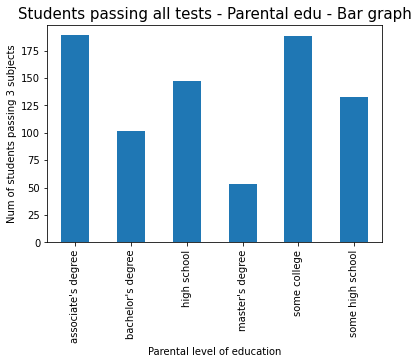

In [131]:
def main():
    pass_dt = df[(df['math score'] >= 50) & (df['reading score'] >= 50) & (df['writing score'] >= 50)]
    
    print('The impact of Parental Level of Education on Pass Rate')
    
    parental_impact(pass_dt)
    bar_graph_edu(pass_dt)
    
main()

# 8. Code the function to list Math Scores by Parental Level of Education, determine which groups have the excellent / good Math Score

In [132]:
def ple_math_minmax(dt):
    edu_group = dt['parental level of education'].unique()
    edu_group_dict = {}
    max_rate = 0
    max_name = ''
    min_rate = 100
    min_name = ''

    for i in edu_group:
        edu_group_dict[i] = round(len(dt[dt['parental level of education'] == i]) / len(dt) * 100, 2)
        if edu_group_dict[i] > max_rate:
            max_rate = edu_group_dict[i]
            max_name = i
    return max_rate, max_name

In [133]:
def main():
    plt_mathsc = df[['parental level of education', 'math score']]
    
    plt_mathsc_excellent = df[df['math score'] >= 90]
    max_rate, max_name = ple_math_minmax(plt_mathsc_excellent)
    print(max_rate, "% children with excellent Math score - Parental level of education is", max_name)
    
    plt_mathsc_good = df[(df['math score'] <= 90) & (df['math score'] >= 70)]
    max_rate, max_name = ple_math_minmax(plt_mathsc_good)
    print(max_rate, "% children with good Math score - Parental level of education is", max_name)

main()

36.21 % children with excellent Math score - Parental level of education is associate's degree
22.84 % children with good Math score - Parental level of education is some college


# 9. Code the function to detect if the student pass the exams at good marks (>70) with preparation

In [134]:
def pass_with_prep(dt):
    good_pass = dt[(dt['math score'] >= 70) & (dt['reading score'] >= 70) & (dt['writing score'] >= 70)]
    prep = good_pass['test preparation course'].unique()
    prep_dict = {}
    for i in prep:
        prep_dict[i] = len(good_pass[good_pass['test preparation course'] == i])
    return prep_dict

In [135]:
def pie_chart_prep(prep_dict):        
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    prep_status = prep_dict.keys()
    pass_num = prep_dict.values()
    ax.pie(pass_num, labels = prep_status, autopct='%1.2f%%')
    plt.title(f'Students passing the test - Prep status - Pie chart', fontsize=15)
    plt.show()

  test preparation course  count
0                    none    174
1               completed    150


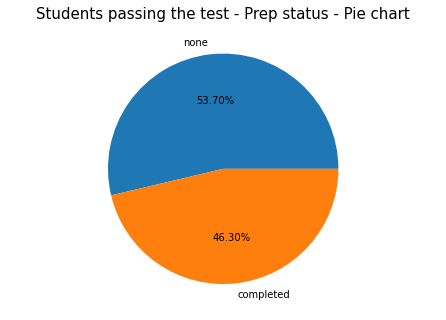

In [136]:
def main():
    pass_dt = df[(df['math score'] >= 50) & (df['reading score'] >= 50) & (df['writing score'] >= 50)]
    pass_dt_prep = df[['test preparation course','math score','reading score','writing score']]
    
    prep_dict = pass_with_prep(pass_dt_prep)
    
    prep_df = pd.DataFrame()
    prep_df['test preparation course'] = prep_dict.keys()
    prep_df['count'] = prep_dict.values()
    print(prep_df)

    pie_chart_prep(prep_dict)
    
main()

# 10. Draw the graph for the number and rate of students passing the test basing on ethnicity

In [137]:
def bar_graph_ethnicity(dt, subject):
    pass_dt = dt[dt[subject] >= 50]
    pass_dt.groupby('race/ethnicity')[subject].nunique().plot(kind='bar')
    plt.xlabel('Ethnicity', fontsize=10)
    plt.ylabel('Number of students passing', fontsize=10)
    plt.title(f'Students passing the test - Ethnicity - Bar graph', fontsize=15)
    plt.show()

In [138]:
def pie_chart_ethnicity(dt, subject):
    group = dt['race/ethnicity'].unique()
    pass_rate_dict = {}
    
    for gr in group:
        data_cut = dt[dt['race/ethnicity'] == gr]
        num = len(data_cut)
        pass_num = len(data_cut[data_cut[subject] >= 50])
        pass_rate = pass_num / num * 100

        pass_rate_dict[gr] = pass_rate
        
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    group_name = pass_rate_dict.keys()
    pass_rate_name = pass_rate_dict.values()
    ax.pie(pass_rate_name, labels = group_name, autopct='%1.2f%%')
    plt.title(f'Students passing the test - Ethnicity - Pie chart', fontsize=15)
    plt.show()

Draw the graph for the number of students passing the test basing on ethnicity
Enter the subject: [1] Math - [2] Reading - [3] Writing : 1


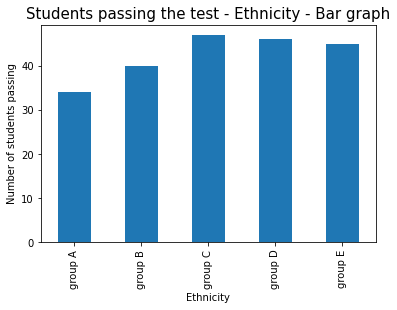

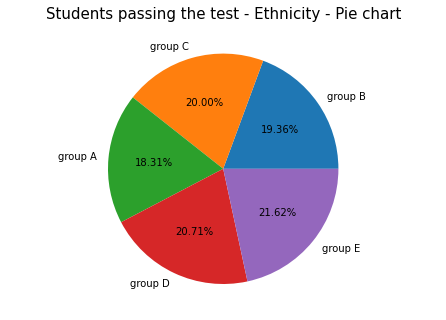

In [139]:
def main():
    print('Draw the graph for the number of students passing the test basing on ethnicity')
    subject = choose_subject(df)
    
    bar_graph_ethnicity(df, subject)
    pie_chart_ethnicity(df, subject)
    
main()